In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')


In [2]:
data = pd.read_csv(r"C:\Users\hp\Desktop\Machine Learning R_27.07.21\Machine Learning Project 36 - Student Performance Analysis\StudentsPerformance.csv")

In [3]:
data.sample(5) # lets see the random rows of data.

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score
348,male,group D,high school,free/reduced,none,75,74,66
856,male,group B,some college,free/reduced,none,75,68,65
674,female,group D,high school,standard,completed,69,77,78
940,male,group C,master's degree,free/reduced,completed,72,66,72
470,female,group C,associate's degree,standard,completed,83,85,90


In [4]:
data.shape #Shape of the data 

(1000, 8)

In [5]:
data.info() # info provide that there is no nul value in the data.

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 8 columns):
 #   Column                       Non-Null Count  Dtype 
---  ------                       --------------  ----- 
 0   gender                       1000 non-null   object
 1   race/ethnicity               1000 non-null   object
 2   parental level of education  1000 non-null   object
 3   lunch                        1000 non-null   object
 4   test preparation course      1000 non-null   object
 5   math score                   1000 non-null   int64 
 6   reading score                1000 non-null   int64 
 7   writing score                1000 non-null   int64 
dtypes: int64(3), object(5)
memory usage: 62.6+ KB


## Descriptive Statistics

In [6]:
data.describe() # describe fuction give us the statical summary of the data .

,math score,reading score,writing score
count,1000.00000,1000.000000,1000.000000
mean,66.08900,69.169000,68.054000
std,15.16308,14.600192,15.195657
min,0.00000,17.000000,10.000000
25%,57.00000,59.000000,57.750000
50%,66.00000,70.000000,69.000000
75%,77.00000,79.000000,79.000000
max,100.00000,100.000000,100.000000


In [7]:
#lets check for the unique values in dataset for object datatype 
data.select_dtypes('object').nunique()

gender                         2
race/ethnicity                 5
parental level of education    6
lunch                          2
test preparation course        2
dtype: int64

In [8]:
#lets check for the null values in dataset 
data.isnull().sum()

gender                         0
race/ethnicity                 0
parental level of education    0
lunch                          0
test preparation course        0
math score                     0
reading score                  0
writing score                  0
dtype: int64

In [9]:
# I am using the libaray dabl for the vizualizastion
import dabl

Target looks like regression


[<AxesSubplot:title={'center':'Target distribution'}, xlabel='math score', ylabel='frequency'>,
 array([[<AxesSubplot:title={'center':'F=8.04E-01'}, xlabel='reading score', ylabel='math score'>,
         <AxesSubplot:title={'center':'F=7.78E-01'}, xlabel='writing score'>]],
       dtype=object),
 array([[<AxesSubplot:title={'center':'F=6.49E-02'}, xlabel='math score', ylabel='gender'>,
         <AxesSubplot:title={'center':'F=3.72E-02'}, xlabel='math score', ylabel='race/ethnicity'>,
         <AxesSubplot:title={'center':'F=2.30E-02'}, xlabel='math score', ylabel='parental level of education'>,
         <AxesSubplot:title={'center':'F=2.06E-02'}, xlabel='math score', ylabel='lunch'>,
         <AxesSubplot:title={'center':'F=2.94E-03'}, xlabel='math score', ylabel='test preparation course'>]],
       dtype=object)]

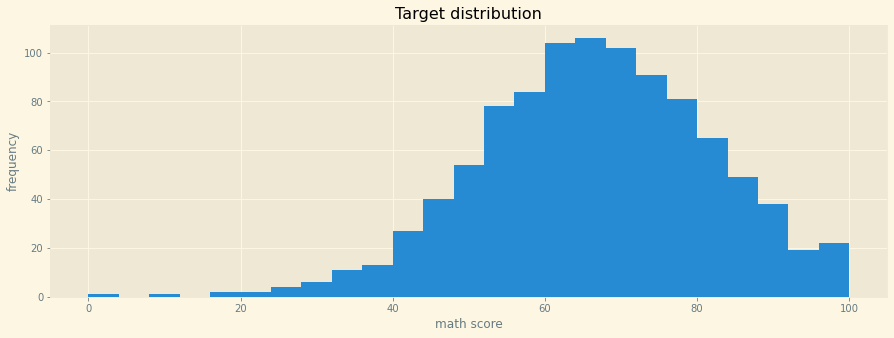

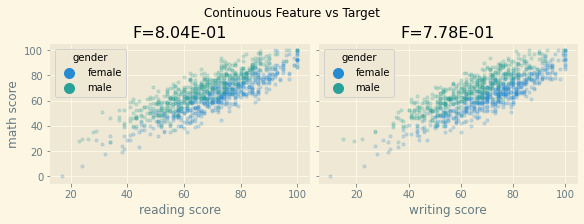

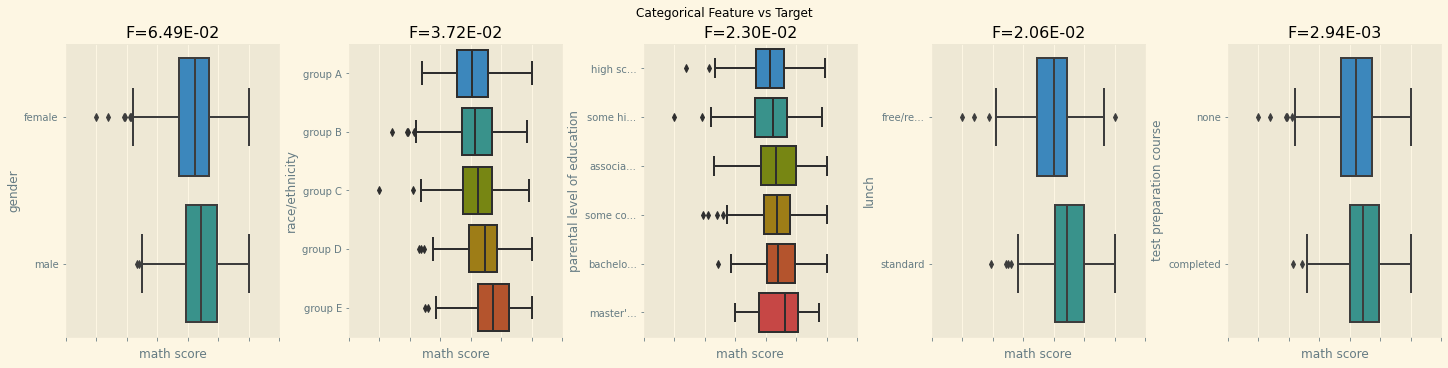

In [10]:
# lets see the maths score W.R.T to other columns 
plt.rcParams['figure.figsize'] = (15,5)
plt.style.use('Solarize_Light2')
dabl.plot(data,target_col='math score')

Target looks like regression


[<AxesSubplot:title={'center':'Target distribution'}, xlabel='reading score', ylabel='frequency'>,
 array([[<AxesSubplot:title={'center':'F=9.49E-01'}, xlabel='writing score', ylabel='reading score'>,
         <AxesSubplot:title={'center':'F=8.04E-01'}, xlabel='math score'>]],
       dtype=object),
 array([[<AxesSubplot:title={'center':'F=4.96E-02'}, xlabel='reading score', ylabel='gender'>,
         <AxesSubplot:title={'center':'F=4.51E-02'}, xlabel='reading score', ylabel='race/ethnicity'>,
         <AxesSubplot:title={'center':'F=2.67E-02'}, xlabel='reading score', ylabel='parental level of education'>,
         <AxesSubplot:title={'center':'F=2.62E-02'}, xlabel='reading score', ylabel='lunch'>,
         <AxesSubplot:title={'center':'F=2.33E-02'}, xlabel='reading score', ylabel='test preparation course'>]],
       dtype=object)]

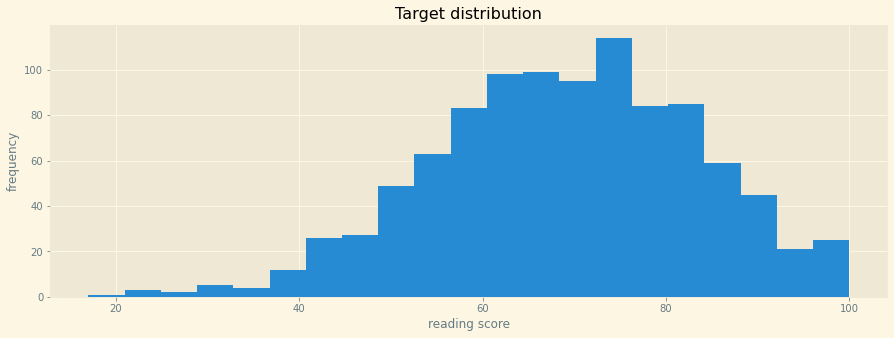

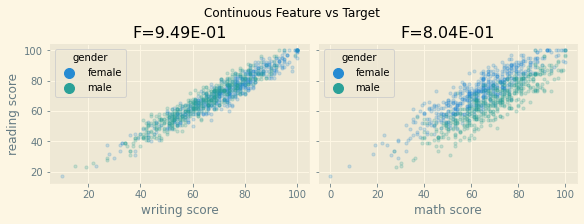

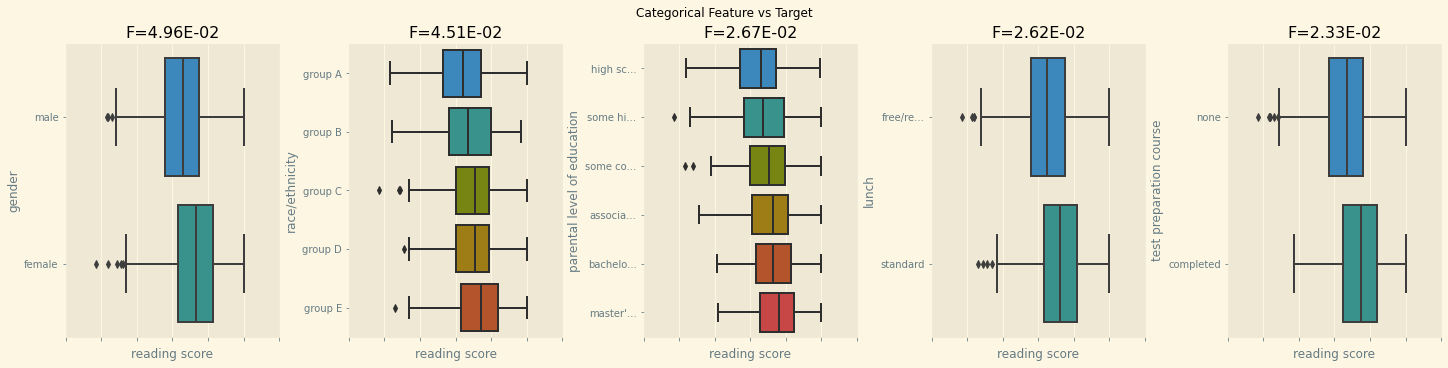

In [11]:
# comparison of all columns wrt to reading score
plt.rcParams['figure.figsize'] = (15,5)
plt.style.use('Solarize_Light2')
dabl.plot(data,target_col='reading score')

Target looks like regression


[<AxesSubplot:title={'center':'Target distribution'}, xlabel='writing score', ylabel='frequency'>,
 array([[<AxesSubplot:title={'center':'F=9.49E-01'}, xlabel='reading score', ylabel='writing score'>,
         <AxesSubplot:title={'center':'F=7.78E-01'}, xlabel='math score'>]],
       dtype=object),
 array([[<AxesSubplot:title={'center':'F=5.83E-02'}, xlabel='writing score', ylabel='gender'>,
         <AxesSubplot:title={'center':'F=5.60E-02'}, xlabel='writing score', ylabel='race/ethnicity'>,
         <AxesSubplot:title={'center':'F=5.46E-02'}, xlabel='writing score', ylabel='parental level of education'>,
         <AxesSubplot:title={'center':'F=4.27E-02'}, xlabel='writing score', ylabel='lunch'>,
         <AxesSubplot:title={'center':'F=3.49E-02'}, xlabel='writing score', ylabel='test preparation course'>]],
       dtype=object)]

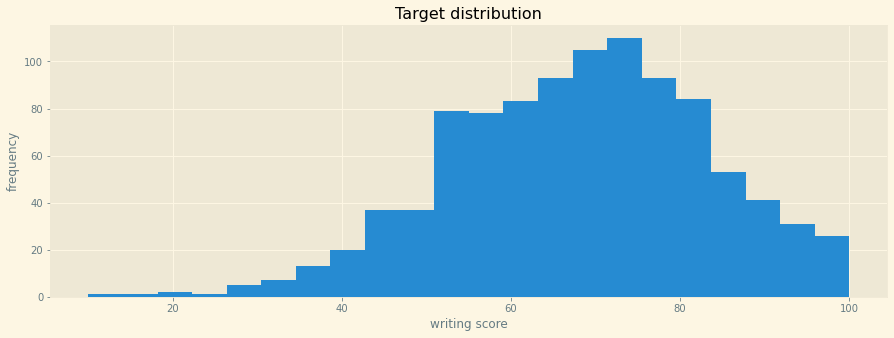

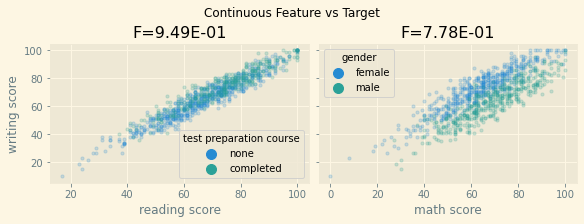

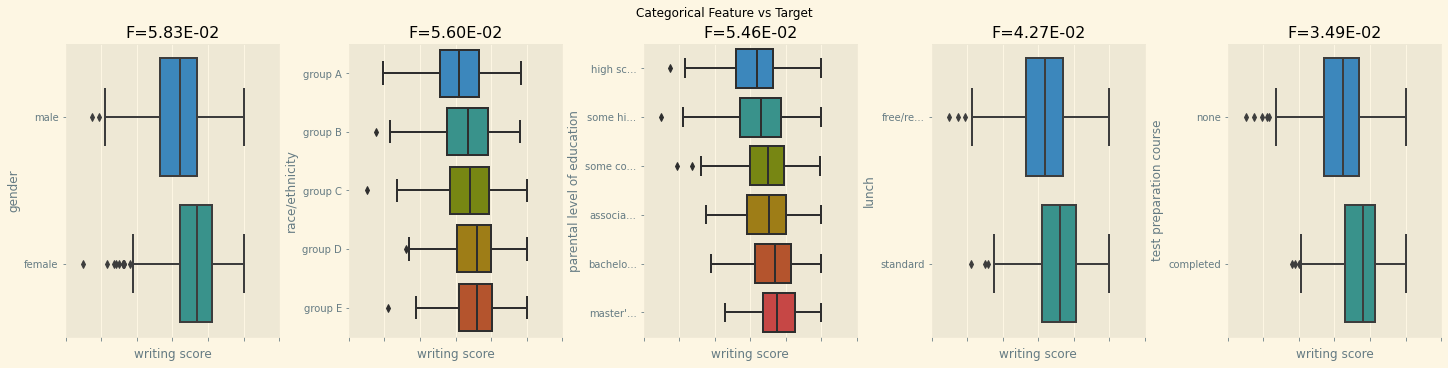

In [12]:
# performance wrt to writting score
plt.rcParams['figure.figsize'] = (15,5)
plt.style.use('Solarize_Light2')
dabl.plot(data,target_col='writing score')

## Inferential Statistics

** Lets check the Probability of Students Scoring More than 50 Marks in Maths**

In [13]:
total_students = data.shape[0]
students_score_more_than_50 = data[data['math score'] > 50].shape[0]

probability_of_students_scoring_more_than_50_in_maths = (students_score_more_than_50/total_students)*100
print("Probability of Students Scoring more than 50 marks in Maths :", probability_of_students_scoring_more_than_50_in_maths)

Probability of Students Scoring more than 50 marks in Maths : 85.0


In [14]:
total_students = data.shape[0]
students_score_more_than_50 = data[data['reading score'] > 50].shape[0]

probability_of_students_scoring_more_than_50_in_reading = (students_score_more_than_50/total_students)*100
print("Probability of Students Scoring more than 50 marks in Reading :", probability_of_students_scoring_more_than_50_in_reading)

Probability of Students Scoring more than 50 marks in Reading : 90.3


In [15]:
total_students = data.shape[0]
students_score_more_than_50 = data[data['writing score'] > 50].shape[0]

probability_of_students_scoring_more_than_50_in_writing = (students_score_more_than_50/total_students)*100
print("Probability of Students Scoring more than 50 marks in Writing :", probability_of_students_scoring_more_than_50_in_writing)

Probability of Students Scoring more than 50 marks in Writing : 87.6


** Lets also check the Probability of Students Passing in all the three Subjects**

In [17]:
total_students = data.shape[0]
number_of_students_passing_in_all_subjects = data[(data['math score'] > 40) &
                                                  (data['writing score'] > 40) & 
                                                  (data['reading score'] > 40)].shape[0]
probability_of_students_passing_in_all_the_subjects = (number_of_students_passing_in_all_subjects/total_students)*100
print("The Probability of Students Passing in all the Subjects is {0:.2f} %".format(probability_of_students_passing_in_all_the_subjects))

The Probability of Students Passing in all the Subjects is 93.90 %


** Lets also check the Probability of Students Scoring more than 90 in all the three Subjects**

In [18]:
total_students = data.shape[0]
number_of_students_scoring_more_than_90 = data[(data['math score'] > 90) &
                                                  (data['writing score'] > 90) & 
                                                  (data['reading score'] > 90)].shape[0]

probability_of_students_scoring_more_than_90_in_all_subjects = (number_of_students_scoring_more_than_90/total_students)*100
print("The Probability of Students Passing in all the Subjects is {0:.2f} %".
      format(probability_of_students_scoring_more_than_90_in_all_subjects))

The Probability of Students Passing in all the Subjects is 2.30 %


** Checking for Skewness for the Maths, Reading and Writing Scores**

C:\Users\hp\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\hp\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\hp\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level functi

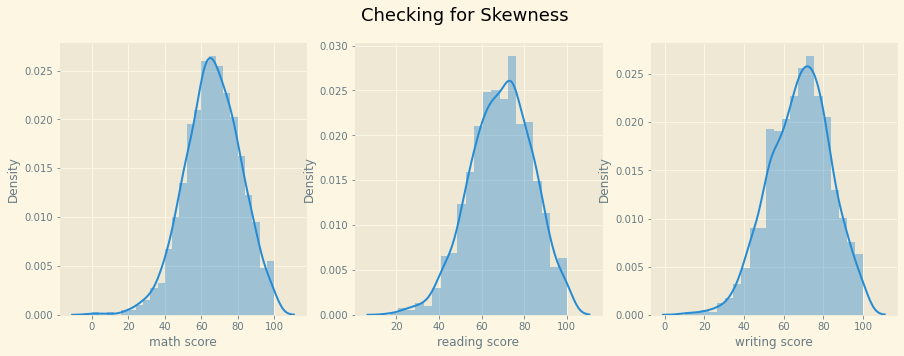

In [19]:
plt.subplot(1, 3, 1)
sns.distplot(data['math score'])

plt.subplot(1, 3, 2)
sns.distplot(data['reading score'])

plt.subplot(1, 3, 3)
sns.distplot(data['writing score'])

plt.suptitle('Checking for Skewness', fontsize = 18)
plt.show()

## Grouping Operations

In [20]:
data[(data['gender'] == 'female') &
     (data['math score'] > 90) & 
     (data['writing score'] > 90) &
     (data['reading score'] > 90)]

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score
114,female,group E,bachelor's degree,standard,completed,99,100,100
165,female,group C,bachelor's degree,standard,completed,96,100,100
179,female,group D,some high school,standard,completed,97,100,100
451,female,group E,some college,standard,none,100,92,97
458,female,group E,bachelor's degree,standard,none,100,100,100
546,female,group A,some high school,standard,completed,92,100,97
566,female,group E,bachelor's degree,free/reduced,completed,92,100,100
594,female,group C,bachelor's degree,standard,completed,92,100,99
685,female,group E,master's degree,standard,completed,94,99,100
712,female,group D,some college,standard,none,98,100,99


### Lets compare the scores secured by Boys and Girls

In [22]:
data.groupby(['gender']).agg(['min','max','median'])

C:\Users\hp\AppData\Local\Temp\ipykernel_7852\1637073921.py:1: FutureWarning: ['race/ethnicity', 'parental level of education', 'lunch', 'test preparation course'] did not aggregate successfully. If any error is raised this will raise in a future version of pandas. Drop these columns/ops to avoid this warning.
  data.groupby(['gender']).agg(['min','max','median'])


math score             reading score             writing score       \
              min  max median           min  max median           min  max   
gender                                                                       
female          0  100   65.0            17  100   73.0            10  100   
male           27  100   69.0            23  100   66.0            15  100   

               
       median  
gender         
female   74.0  
male     64.0

In [23]:
data[['lunch','gender','math score','writing score','reading score']].groupby(['lunch','gender']).agg('median')

math score  writing score  reading score
lunch        gender                                          
free/reduced female        57.0           68.0           67.0
             male          62.0           59.0           61.0
standard     female        67.0           76.0           75.0
             male          72.0           67.0           67.5

In [24]:
data[['test preparation course',
      'gender',
      'math score',
      'writing score',
      'reading score']].groupby(['test preparation course','gender']).agg('median')

math score  writing score  reading score
test preparation course gender                                          
completed               female        67.0           79.0           78.0
                        male          73.0           70.0           71.0
none                    female        62.0           70.0           71.0
                        male          67.0           60.0           63.0

### Lets check the Effect of Race and Ethnicity on Student's Performance

In [25]:
data[['race/ethnicity',
      'math score',
      'writing score',
      'reading score']].groupby(['race/ethnicity']).agg('median')

,math score,writing score,reading score
race/ethnicity,,,
group A,61.0,62.0,64.0
group B,63.0,67.0,67.0
group C,65.0,68.0,71.0
group D,69.0,72.0,71.0
group E,74.5,72.0,74.0


## Data Visualizations

C:\Users\hp\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


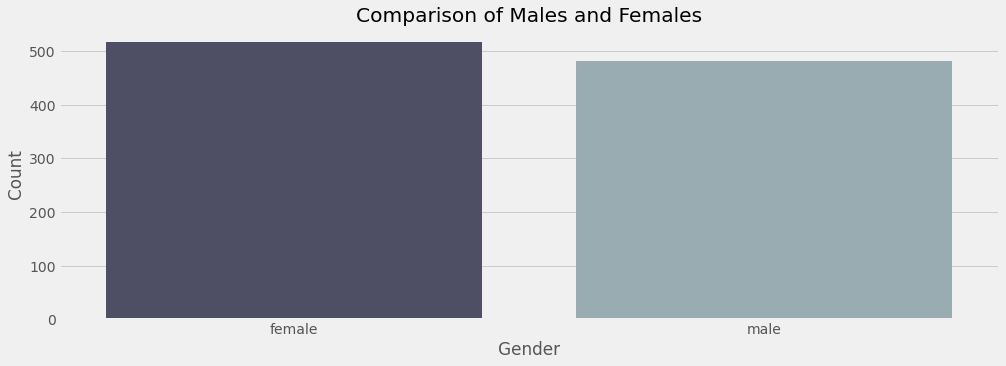

In [30]:
plt.rcParams['figure.figsize'] = (15, 5)
plt.style.use('fivethirtyeight')
sns.countplot(data['gender'], palette = 'bone')
plt.title('Comparison of Males and Females', fontweight = 30)
plt.xlabel('Gender')
plt.ylabel('Count')
plt.show()

C:\Users\hp\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


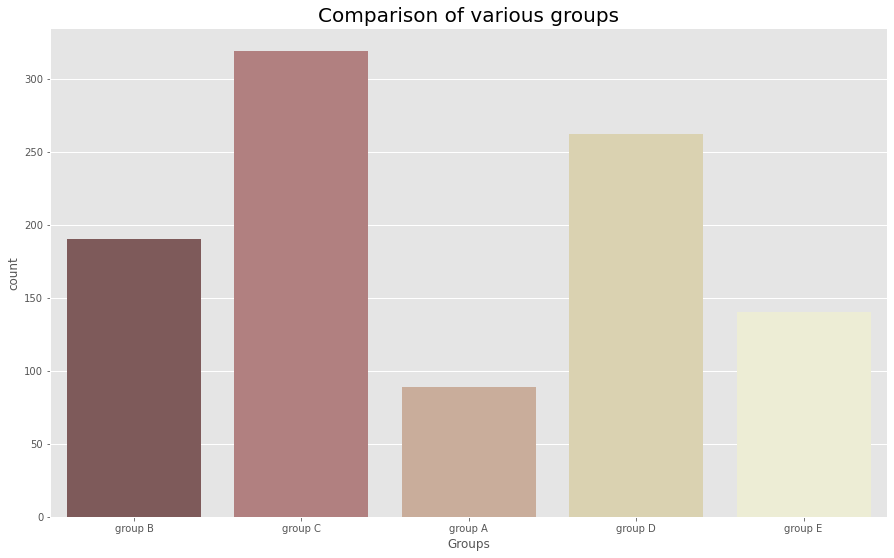

In [28]:
# visualizing the different groups in the dataset

plt.rcParams['figure.figsize'] = (15, 9)
plt.style.use('ggplot')

sns.countplot(data['race/ethnicity'], palette = 'pink')
plt.title('Comparison of various groups', fontweight = 30, fontsize = 20)
plt.xlabel('Groups')
plt.ylabel('count')
plt.show()

C:\Users\hp\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


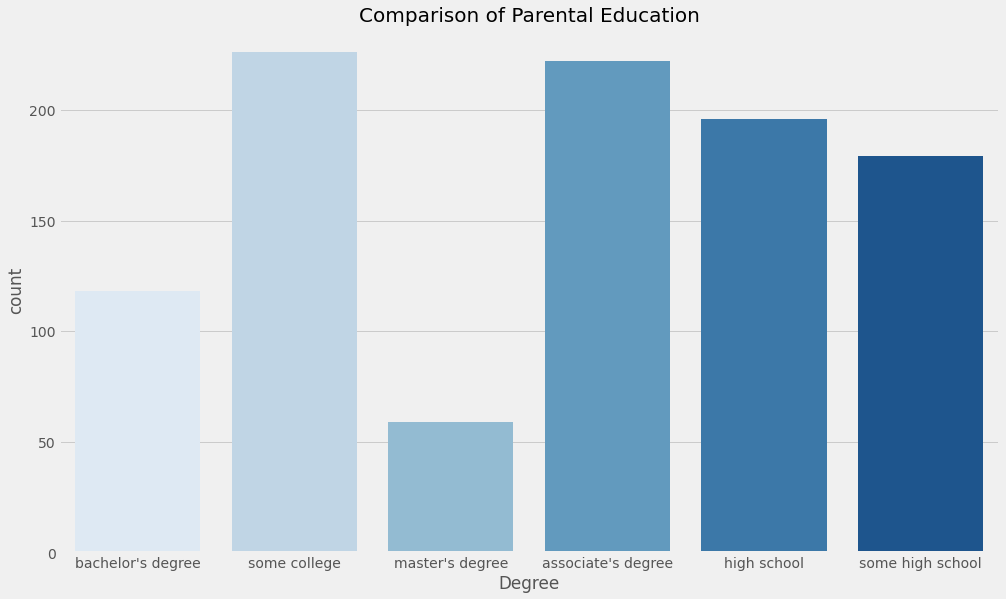

In [29]:
# visualizing the differnt parental education levels

plt.rcParams['figure.figsize'] = (15, 9)
plt.style.use('fivethirtyeight')

sns.countplot(data['parental level of education'], palette = 'Blues')
plt.title('Comparison of Parental Education', fontweight = 30, fontsize = 20)
plt.xlabel('Degree')
plt.ylabel('count')
plt.show()

C:\Users\hp\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


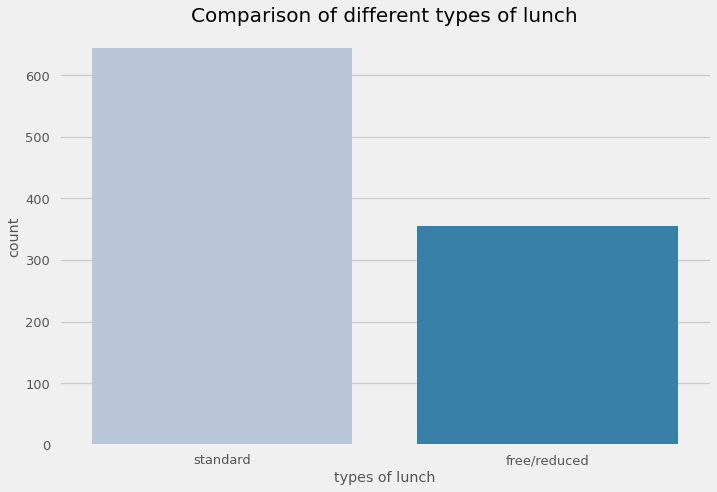

In [31]:
# visualizing different types of lunch 

plt.rcParams['figure.figsize'] = (15, 9)
plt.style.use('seaborn-talk')

sns.countplot(data['lunch'], palette = 'PuBu')
plt.title('Comparison of different types of lunch', fontweight = 30, fontsize = 20)
plt.xlabel('types of lunch')
plt.ylabel('count')
plt.show()

C:\Users\hp\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


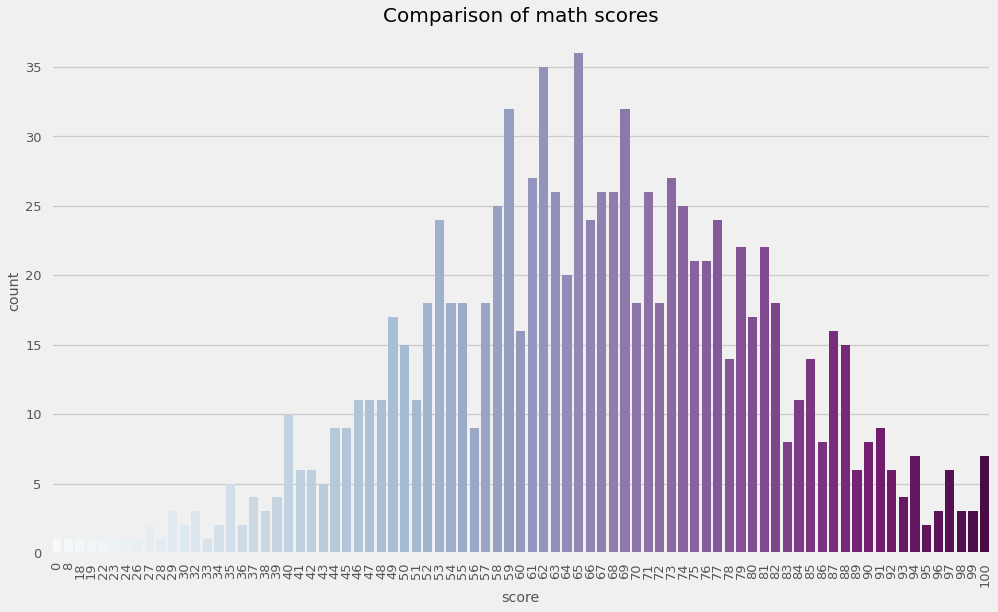

In [32]:
# visualizing maths score

plt.rcParams['figure.figsize'] = (15, 9)
plt.style.use('tableau-colorblind10')

sns.countplot(data['math score'], palette = 'BuPu')
plt.title('Comparison of math scores', fontweight = 30, fontsize = 20)
plt.xlabel('score')
plt.ylabel('count')
plt.xticks(rotation = 90)
plt.show()

C:\Users\hp\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


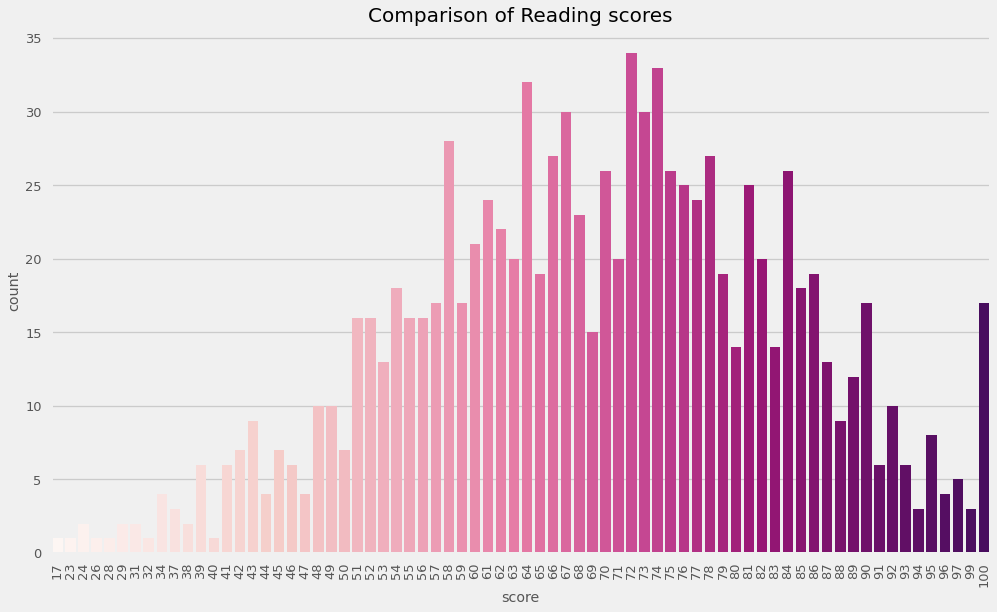

In [33]:
## visualizing reading score

plt.rcParams['figure.figsize'] = (15, 9)
plt.style.use('tableau-colorblind10')

sns.countplot(data['reading score'], palette = 'RdPu')
plt.title('Comparison of Reading scores', fontweight = 30, fontsize = 20)
plt.xlabel('score')
plt.ylabel('count')
plt.xticks(rotation = 90)
plt.show()

C:\Users\hp\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


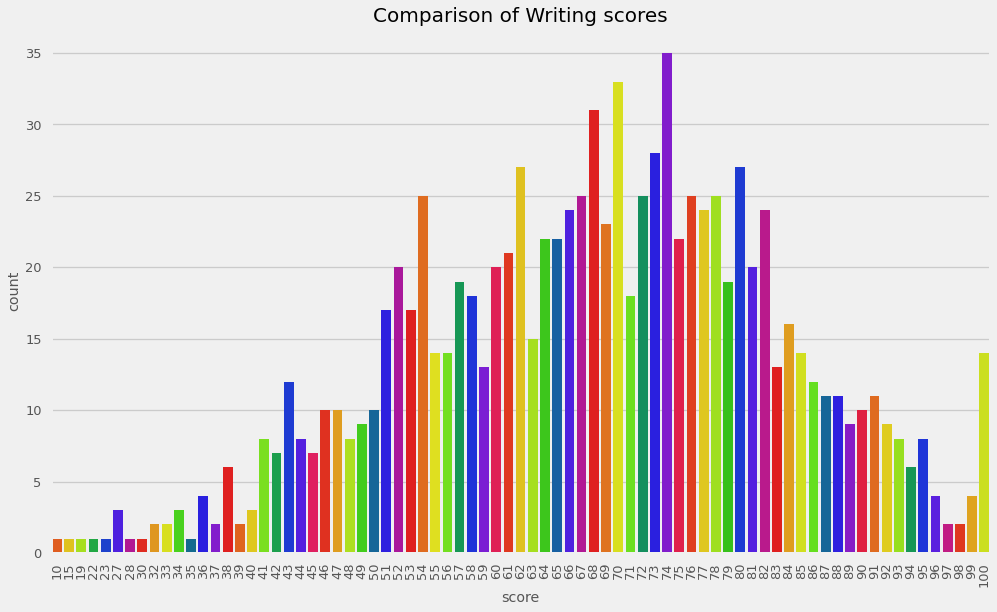

In [34]:
# visualizing writing score

plt.rcParams['figure.figsize'] = (15, 9)
plt.style.use('tableau-colorblind10')

sns.countplot(data['writing score'], palette = 'prism')
plt.title('Comparison of Writing scores', fontweight = 30, fontsize = 20)
plt.xlabel('score')
plt.ylabel('count')
plt.xticks(rotation = 90)
plt.show()

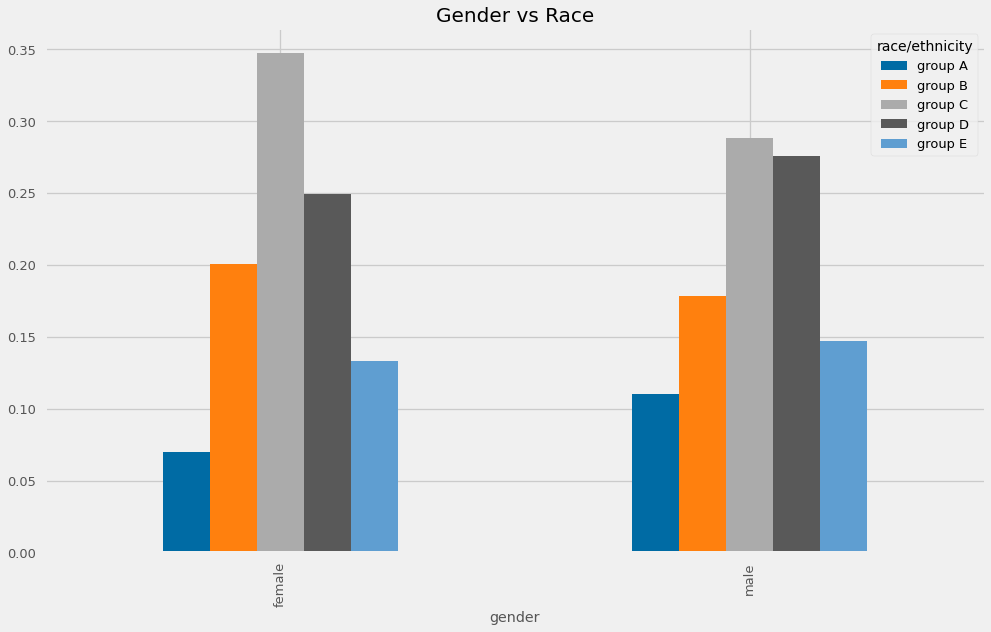

In [41]:
# gender vs race/etnicity 

plt.rcParams['figure.figsize'] = (15, 9)
x = pd.crosstab(data['gender'], data['race/ethnicity'])
x.div(x.sum(1).astype(float), axis = 0).plot(kind = 'bar', stacked = False)
plt.title('Gender vs Race', fontweight = 30, fontsize = 20)
plt.show()

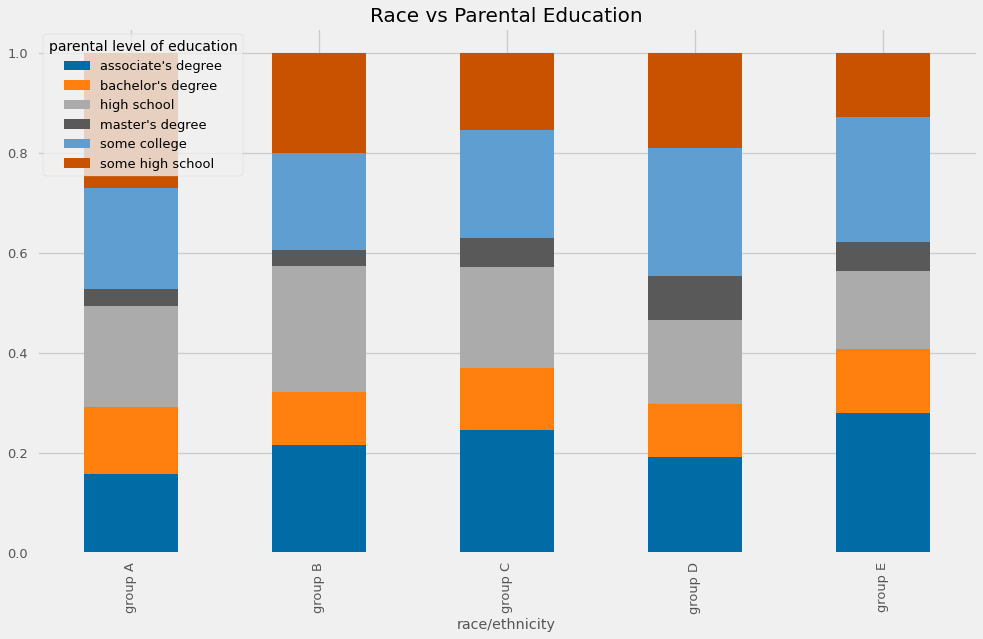

In [42]:
# comparison of race/ethnicity and parental level of education

plt.rcParams['figure.figsize'] = (15, 9)
x = pd.crosstab(data['race/ethnicity'], data['parental level of education'])
x.div(x.sum(1).astype(float), axis = 0).plot(kind = 'bar', stacked = 'True')
plt.title('Race vs Parental Education', fontweight = 30, fontsize = 20)
plt.show()

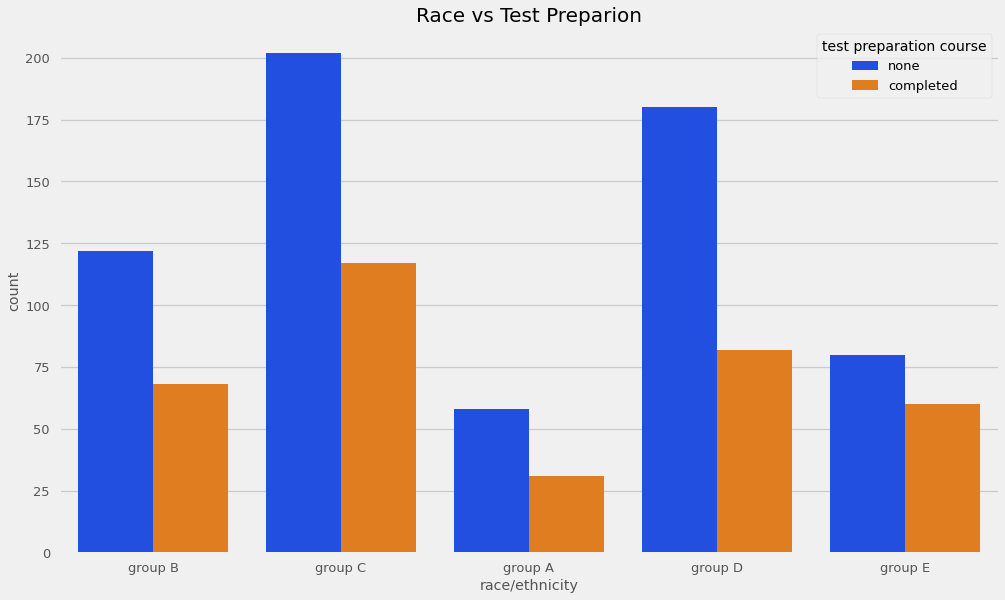

In [43]:
# comparison of race/ethnicity and test preparation course

sns.countplot(x = 'race/ethnicity', data = data,  hue = 'test preparation course', palette = 'bright')
plt.title('Race vs Test Preparion', fontweight = 30, fontsize = 20)
plt.show()

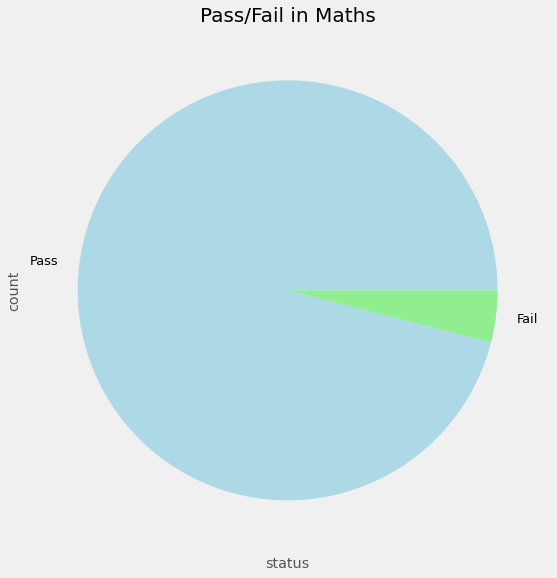

In [44]:
# feature engineering on the data to visualize and solve the dataset more accurately

# setting a passing mark for the students to pass on the three subjects individually
passmarks = 40

# creating a new column pass_math, this column will tell us whether the students are pass or fail
data['pass_math'] = np.where(data['math score']< passmarks, 'Fail', 'Pass')
data['pass_math'].value_counts().plot.pie(colors = ['lightblue', 'lightgreen'])

plt.title('Pass/Fail in Maths', fontweight = 30, fontsize = 20)
plt.xlabel('status')
plt.ylabel('count')
plt.show()

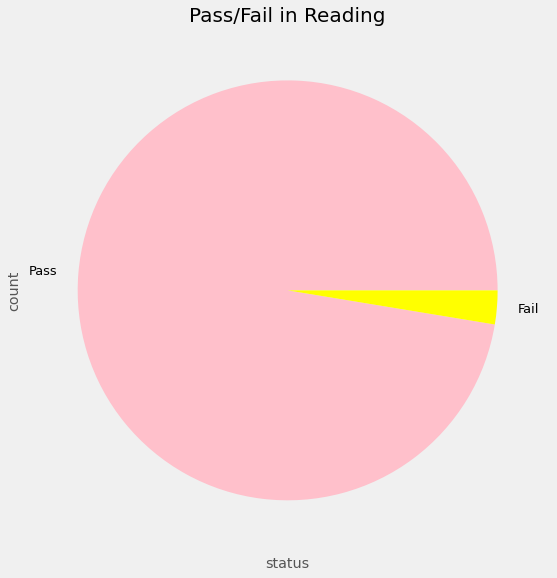

In [45]:
# creating a new column pass_reading, this column will tell us whether the students are pass or fail

data['pass_reading'] = np.where(data['reading score']< passmarks, 'Fail', 'Pass')
data['pass_reading'].value_counts(dropna = False).plot.pie(colors = ['pink', 'yellow'])

plt.title('Pass/Fail in Reading', fontweight = 30, fontsize = 20)
plt.xlabel('status')
plt.ylabel('count')
plt.show()

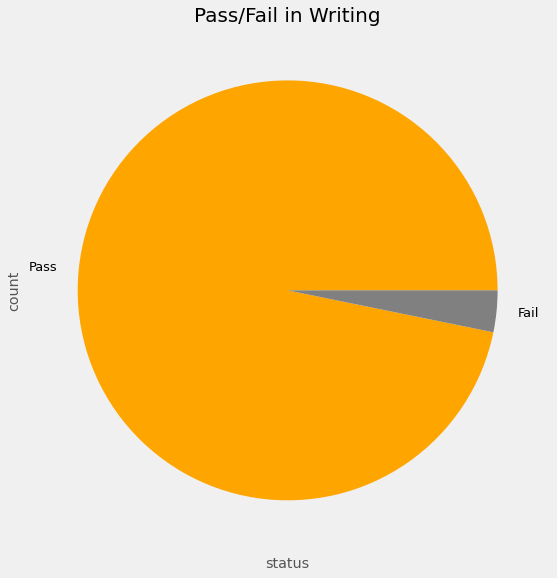

In [46]:
# creating a new column pass_writing, this column will tell us whether the students are pass or fail

data['pass_writing'] = np.where(data['writing score']< passmarks, 'Fail', 'Pass')
data['pass_writing'].value_counts(dropna = False).plot.pie(colors = ['orange', 'gray'])

plt.title('Pass/Fail in Writing', fontweight = 30, fontsize = 20)
plt.xlabel('status')
plt.ylabel('count')
plt.show()

C:\Users\hp\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


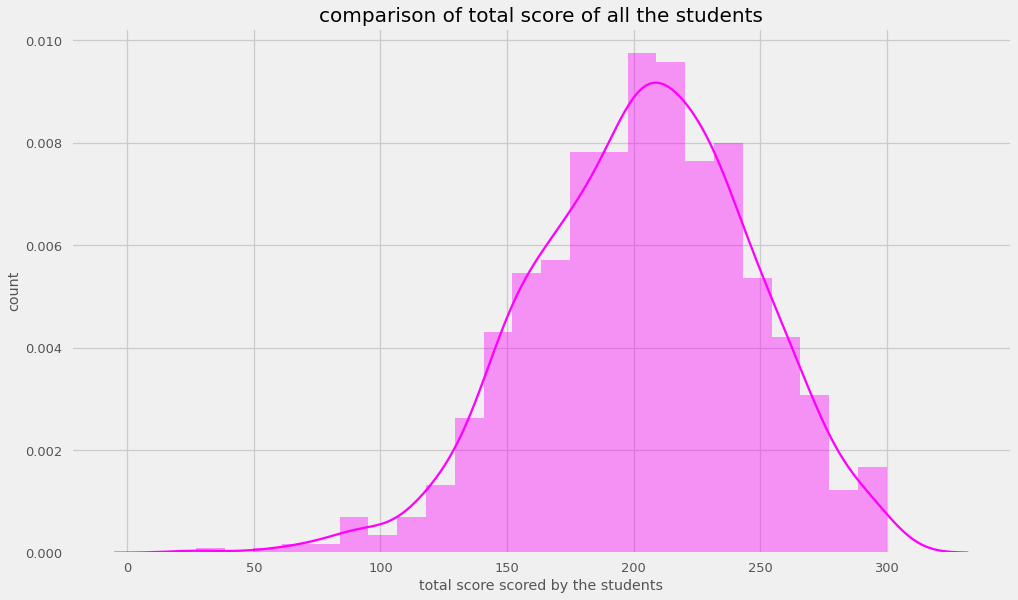

In [47]:
data['total_score'] = data['math score'] + data['reading score'] + data['writing score']

sns.distplot(data['total_score'], color = 'magenta')

plt.title('comparison of total score of all the students', fontweight = 30, fontsize = 20)
plt.xlabel('total score scored by the students')
plt.ylabel('count')
plt.show()

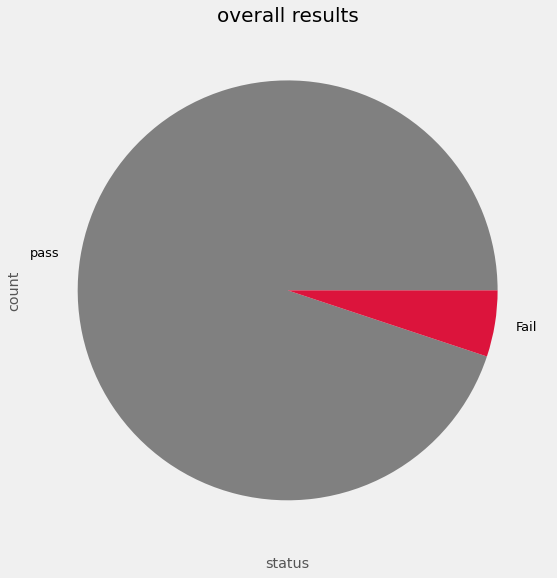

In [48]:
data['status'] = data.apply(lambda x : 'Fail' if x['pass_math'] == 'Fail' or 
                           x['pass_reading'] == 'Fail' or x['pass_writing'] == 'Fail'
                           else 'pass', axis = 1)

data['status'].value_counts(dropna = False).plot.pie(colors = ['grey', 'crimson'])
plt.title('overall results', fontweight = 30, fontsize = 20)
plt.xlabel('status')
plt.ylabel('count')
plt.show()

In [50]:
data['percentage'] = data['total_score']/3
# Assigning grades to the grades according to the following criteria :
# 0  - 40 marks : grade E
# 41 - 60 marks : grade D
# 60 - 70 marks : grade C
# 70 - 80 marks : grade B
# 80 - 90 marks : grade A
# 90 - 100 marks : grade O

def getgrade(percentage, status):
  if status == 'Fail':
    return 'E'
  if(percentage >= 90):
    return 'O'
  if(percentage >= 80):
    return 'A'
  if(percentage >= 70):
    return 'B'
  if(percentage >= 60):
    return 'C'
  if(percentage >= 40):
    return 'D'
  else :
    return 'E'

data['grades'] = data.apply(lambda x: getgrade(x['percentage'], x['status']), axis = 1 )

data['grades'].value_counts()

B    261
C    256
D    234
A    146
O     52
E     51
Name: grades, dtype: int64

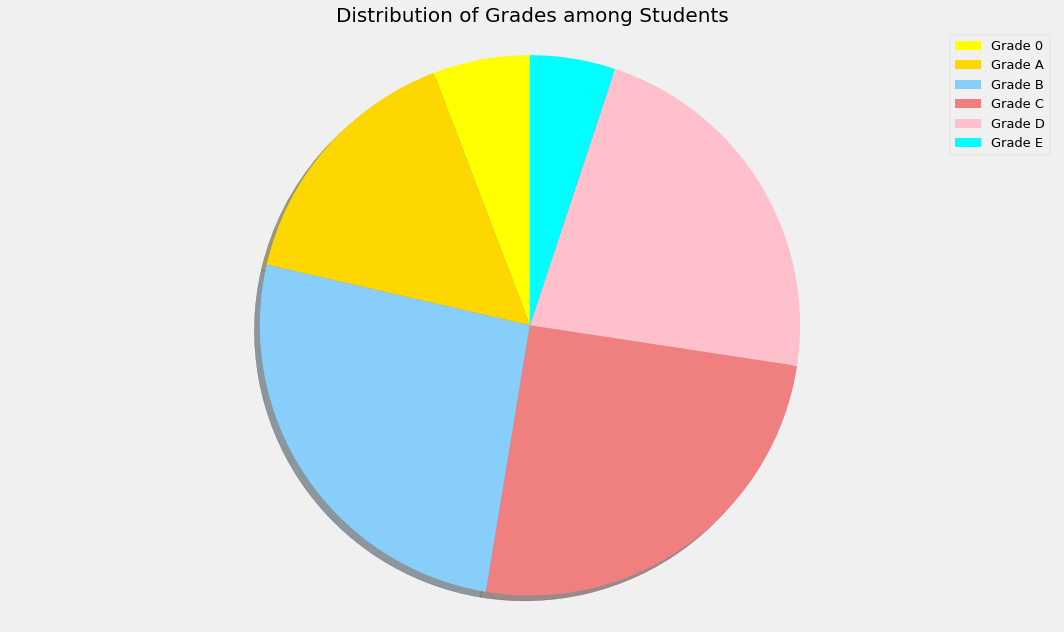

In [51]:
# plotting a pie chart for the distribution of various grades amongst the students

labels = ['Grade 0', 'Grade A', 'Grade B', 'Grade C', 'Grade D', 'Grade E']
sizes = [58, 156, 260, 252, 223, 51]
colors = ['yellow', 'gold', 'lightskyblue', 'lightcoral', 'pink', 'cyan']
explode = (0.0001, 0.0001, 0.0001, 0.0001, 0.0001, 0.0001)

patches, texts = plt.pie(sizes, colors=colors, shadow=True, startangle=90)
plt.legend(patches, labels)
plt.title('Distribution of Grades among Students', fontweight = 30, fontsize = 20)
plt.axis('equal')
plt.tight_layout()
plt.show()

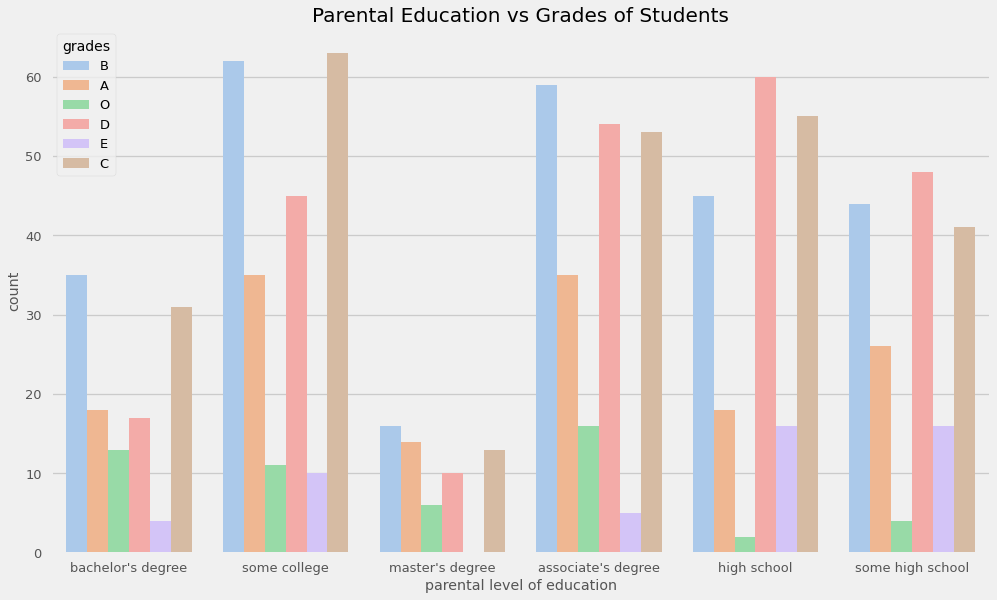

In [52]:
# for better visualization we will plot it again using seaborn

sns.countplot(x = data['parental level of education'], data = data, hue = data['grades'], palette = 'pastel')
plt.title('Parental Education vs Grades of Students', fontsize = 20, fontweight = 30)
plt.show()

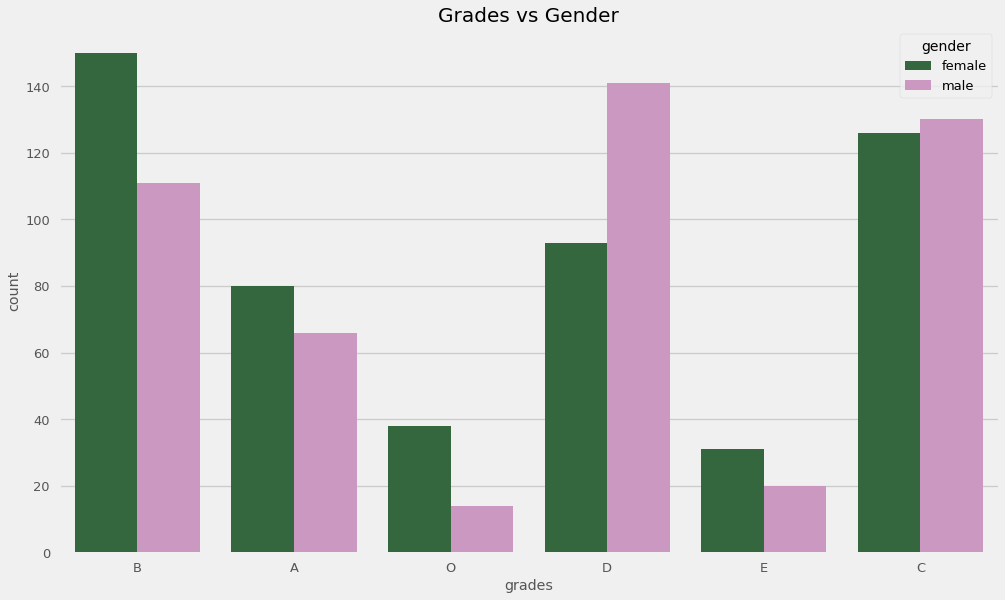

In [54]:
#comparing the distribution of grades among males and females

sns.countplot(x = data['grades'], data = data, hue = data['gender'], palette = 'cubehelix')
#sns.palplot(sns.dark_palette('purple'))
plt.title('Grades vs Gender', fontweight = 30, fontsize = 20)
plt.show()

## Thank You for reading 